<a href="https://colab.research.google.com/github/hadar-grimberg/data-science-portfolio/blob/main/Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/avocado.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# -*- coding: utf-8 -*-
"""
Primrose
"""

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

"""Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold
"""

'Some relevant columns in the dataset:\n\n    Date - The date of the observation\n    AveragePrice - the average price of a single avocado\n    type - conventional or organic\n    year - the year\n    Region - the city or region of the observation\n    Total Volume - Total number of avocados sold\n    4046 - Total number of avocados with PLU 4046 sold\n    4225 - Total number of avocados with PLU 4225 sold\n    4770 - Total number of avocados with PLU 4770 sold\n'

In [ ]:

# option controls the number of columns / rows to be printed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:.2f}'.format)

# read data
avocado = pd.read_csv(root_path)


In [ ]:
# explore the data
print(avocado.head())

   Unnamed: 0        Date  AveragePrice  Total Volume    4046      4225  \
0           0  2015-12-27          1.33      64236.62 1036.74  54454.85   
1           1  2015-12-20          1.35      54876.98  674.28  44638.81   
2           2  2015-12-13          0.93     118220.22  794.70 109149.67   
3           3  2015-12-06          1.08      78992.15 1132.00  71976.41   
4           4  2015-11-29          1.28      51039.60  941.48  43838.39   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0  48.16     8696.87     8603.62       93.25         0.00  conventional  2015   
1  58.33     9505.56     9408.07       97.49         0.00  conventional  2015   
2 130.50     8145.35     8042.21      103.14         0.00  conventional  2015   
3  72.58     5811.16     5677.40      133.76         0.00  conventional  2015   
4  75.78     6183.95     5986.26      197.69         0.00  conventional  2015   

   region  
0  Albany  
1  Albany  
2  Albany  
3  Albany  
4 

In [ ]:
print(avocado.tail())

       Unnamed: 0        Date  AveragePrice  Total Volume    4046    4225  \
18244           7  2018-02-04          1.63      17074.83 2046.96 1529.20   
18245           8  2018-01-28          1.71      13888.04 1191.70 3431.50   
18246           9  2018-01-21          1.87      13766.76 1191.92 2452.79   
18247          10  2018-01-14          1.93      16205.22 1527.63 2981.04   
18248          11  2018-01-07          1.62      17489.58 2894.77 2356.13   

        4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244   0.00    13498.67    13066.82      431.85         0.00  organic  2018   
18245   0.00     9264.84     8940.04      324.80         0.00  organic  2018   
18246 727.94     9394.11     9351.80       42.31         0.00  organic  2018   
18247 727.01    10969.54    10919.54       50.00         0.00  organic  2018   
18248 224.53    12014.15    11988.14       26.01         0.00  organic  2018   

                 region  
18244  WestTexNewMexico  
1824

In [ ]:
print(avocado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [ ]:
print(avocado.describe())

       Unnamed: 0  AveragePrice  Total Volume        4046        4225  \
count    18249.00      18249.00      18249.00    18249.00    18249.00   
mean        24.23          1.41     850644.01   293008.42   295154.57   
std         15.48          0.40    3453545.36  1264989.08  1204120.40   
min          0.00          0.44         84.56        0.00        0.00   
25%         10.00          1.10      10838.58      854.07     3008.78   
50%         24.00          1.37     107376.76     8645.30    29061.02   
75%         38.00          1.66     432962.29   111020.20   150206.86   
max         52.00          3.25   62505646.52 22743616.17 20470572.61   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags     year  
count   18249.00    18249.00    18249.00    18249.00     18249.00 18249.00  
mean    22839.74   239639.20   182194.69    54338.09      3106.43  2016.15  
std    107464.07   986242.40   746178.51   243965.96     17692.89     0.94  
min         0.00        0.00      

In [ ]:
# Check liniarity between features
avocado['total'] = avocado[['Small Bags', 'Large Bags', 'XLarge Bags']].sum(axis=1)
avocado['diff'] = np.abs(avocado.total-avocado['Total Bags'])
print(avocado[np.abs(avocado.total-avocado['Total Bags'])>1])

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, total, diff]
Index: []


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


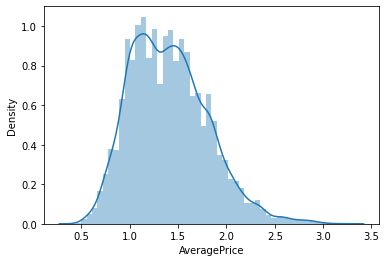

In [ ]:
sns.distplot(avocado['AveragePrice']);

In [ ]:
# plot avocado count sells by year and type
total_sells= avocado[["year","type","Total Volume"]].groupby(["year","type"]).sum()
print(total_sells)

                   Total Volume
year type                      
2015 conventional 4296599235.69
     organic        88869426.35
2016 conventional 4690249813.05
     organic       130640078.78
2017 conventional 4766165793.44
     organic       168139905.83
2018 conventional 1334206069.13
     organic        48532271.13


In [ ]:
total_sells

Total Volume
year type                      
2015 conventional 4296599235.69
     organic        88869426.35
2016 conventional 4690249813.05
     organic       130640078.78
2017 conventional 4766165793.44
     organic       168139905.83
2018 conventional 1334206069.13
     organic        48532271.13

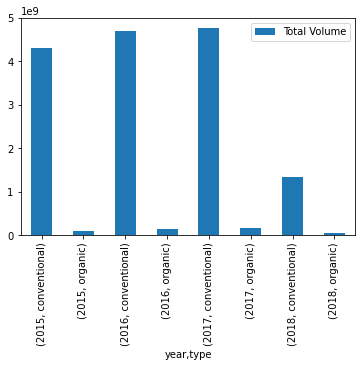

In [ ]:
total_sells.plot.bar()

In [ ]:
# group by multiple columns and perform multiple summary statistic operations
avg_price = avocado.groupby(["year","type"])["AveragePrice"].agg([min,max,np.mean,np.median])
avg_price

min  max  mean  median
year type                                
2015 conventional 0.49 1.59  1.08    1.08
     organic      0.81 2.79  1.67    1.67
2016 conventional 0.51 2.20  1.11    1.08
     organic      0.58 3.25  1.57    1.53
2017 conventional 0.46 2.22  1.29    1.30
     organic      0.44 3.17  1.74    1.72
2018 conventional 0.56 1.74  1.13    1.14
     organic      1.01 2.30  1.57    1.55

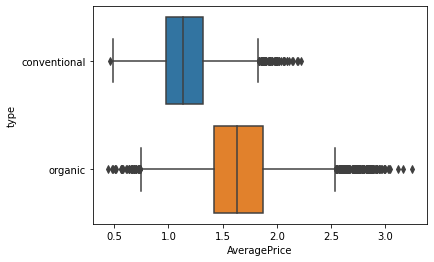

In [ ]:
# plot average price by type
sns.boxplot(y="type", x="AveragePrice", data=avocado)

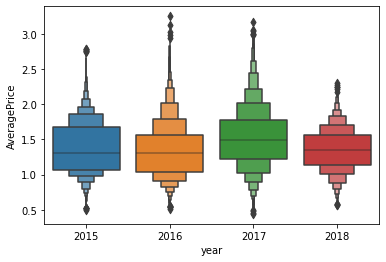

In [ ]:
# plot average price by year
avocado.year=avocado.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=avocado)

Text(0.5, 1.0, 'Monthwise Average Price')

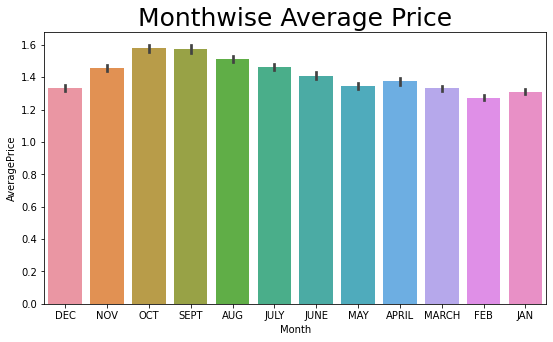

In [ ]:
# Extracting month from date column.
avocado.Date = avocado.Date.apply(pd.to_datetime)
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
# avocado.drop('Date',axis=1,inplace=True)
avocado.Month = avocado.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

plt.figure(figsize=(9,5))
sns.barplot(x="Month", y="AveragePrice", data=avocado)
plt.title('Monthwise Average Price',fontdict={'fontsize':25})

Text(0.5, 1.0, 'Monthwise Distribution of Sales')

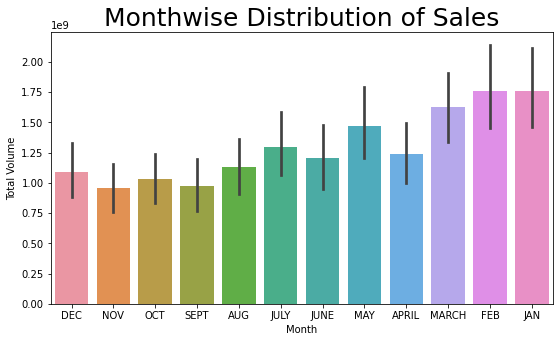

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x="Month", y="Total Volume", data=avocado, estimator=sum)
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})

In [ ]:
#data drop unnecessary columns
avocado.drop(labels=['Unnamed: 0','Date', 'Total Bags','total','diff'], axis=1, inplace=True)
#list of numeric columns
numeric_cols = list(avocado.select_dtypes(include=[np.number]).columns.values)
numeric_cols.remove('AveragePrice')
# convert categorical to one-hot
avocado['type']= avocado['type'].map({'conventional':0,'organic':1})
avocado=avocado[avocado.region.isin(["California", "GreatLakes", "Midsouth", "Northeast", "Plains", "Southeast", "SouthCentral", "West"])]

avocado = pd.get_dummies(avocado,drop_first=True)

X = avocado.drop('AveragePrice', axis=1)
y = avocado['AveragePrice']

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=7)

# convert to X and y and scaling
scaler=StandardScaler()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

model train score =  (<tf.Tensor: shape=(1513, 1), dtype=float64, numpy=
array([[1.4031254 ],
       [1.63852776],
       [1.29407863],
       ...,
       [1.28844411],
       [1.67446167],
       [0.99845873]])>, <tf.Tensor: shape=(), dtype=float64, numpy=0.22539282280751824>)
model test score =  (<tf.Tensor: shape=(812, 1), dtype=float64, numpy=
array([[ 1.32059674e+00],
       [ 1.36596496e+00],
       [ 1.22343995e+00],
       [ 1.11874882e+00],
       [ 1.30420687e+00],
       [ 1.21698935e+00],
       [ 1.42913126e+00],
       [ 9.24798535e-01],
       [ 1.33851820e+00],
       [ 1.00059611e+00],
       [ 1.32854069e+00],
       [ 1.73334111e+00],
       [ 2.12677460e+00],
       [ 1.77070027e+00],
       [ 1.10316656e+00],
       [ 1.00010419e+00],
       [ 1.58071419e+00],
       [ 1.56389689e+00],
       [ 1.68886401e+00],
       [ 1.94104326e+00],
       [ 2.86924000e-01],
       [ 9.19137580e-01],
       [ 1.32445295e+00],
       [ 6.91632806e-01],
       [ 1.46479556e+00],


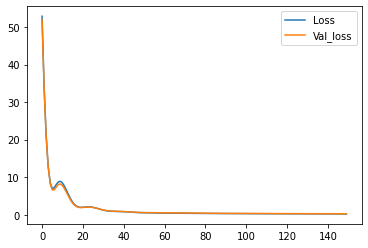

In [ ]:
class myModel:
    def __init__(self, epochs = 150, learning_rate = 0.01):
        self.W = []
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.loss = []
        self.val_loss = []
        self.num_layers = 0
        self.activation = []
        self.layers_shape = []
        self.optimizer = tf.optimizers.Adam( learning_rate )

    def dense(self, inputs , weights, activation = 'Relu'):
        if activation == 'Relu':
            x = tf.nn.relu( tf.matmul( inputs , weights ))
        elif activation == 'Sigmoid':
            x = tf.math.sigmoid( tf.matmul( inputs , weights ))
        else: # default activation is Relu as well
            x = tf.matmul( inputs , weights )
        return x

    def __call__(self, x):
#        x = tf.cast( x , dtype=tf.float32 )
        for i in range(0,self.num_layers-1):
            x = self.dense(x, self.W[i], self.activation[i+1])
        return x

    def compute_loss(self, predicted_y, target_y):
        return tf.reduce_mean( (predicted_y - target_y)**2 )

    def score(self, x, y):
        y_pred = self(x)
        return y_pred, self.compute_loss(y_pred, y)

    def add(self, shape, activation = 'Relu'):
        self.layers_shape.append(shape)

        if self.num_layers == 0:
            self.activation.append('NA')
            self.num_layers += 1

        else:
            self.activation.append(activation)
            W = tf.random.uniform(shape=[self.layers_shape[self.num_layers-1],shape],minval=-1., maxval=1 )
            W = tf.cast( W , dtype=tf.float64 )
            W = tf.Variable(W)
            self.W.append(W)
            self.num_layers += 1

    def train(self, x, y, x_val, y_val):
        x = tf.Variable(x)
        for epoch in range(self.epochs):
            y_pred_val = self(x_val)
            val_loss=tf.reduce_mean((y_pred_val-y_val)**2)
            with tf.GradientTape(persistent=True) as tape:
                y_pred = self(x)
                tape.watch(self.W)
                loss=tf.reduce_mean((y_pred-y)**2)
            grads = tape.gradient(loss,[self.W[i] for i in range(len(self.W))])
            self.optimizer.apply_gradients(zip(grads,  [self.W[i] for i in range(len(self.W))]))

            self.loss.append(loss)
            self.val_loss.append(val_loss)
    def print_model_results(self):
        plt.figure()
        plt.plot(self.loss)
        plt.plot(self.val_loss)
        plt.legend(labels=['Loss',"Val_loss"])
        plt.show()

model = myModel()
model.add(29, 'Relu')
model.add(32, 'Relu')
model.add(16, 'Relu')
model.add(1, "None")

model.train(X_train, y_train, X_val, y_val)
y_pred, score = model.score(X_train,y_train)
print("model train score = ",model.score(X_train,y_train))
print("model test score = ",model.score(X_test,y_test))

model.print_model_results()

In [ ]:
print("model train score = ",model.score(X_train,y_train))

model train score =  (<tf.Tensor: shape=(1513, 1), dtype=float64, numpy=
array([[1.4031254 ],
       [1.63852776],
       [1.29407863],
       ...,
       [1.28844411],
       [1.67446167],
       [0.99845873]])>, <tf.Tensor: shape=(), dtype=float64, numpy=0.22539282280751824>)


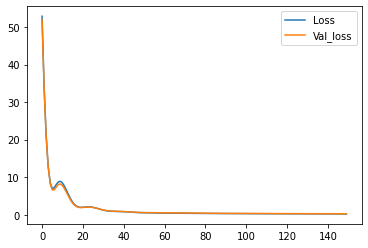

In [ ]:
model.print_model_results()
